In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os.path
from pandas_ods_reader import read_ods

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

Using TensorFlow backend.


In [2]:
fighter_sheet = "raw_fighter_details"
fight_sheet = "raw_total_fight_data"

fighters_ods = "UFC-DATA-DELETE-LATER/raw_fighter_details.ods"
fights_ods = "UFC-DATA-DELETE-LATER/raw_total_fight_data.ods"

In [3]:
fights_data = read_ods(fights_ods, fight_sheet)
fighters_data = read_ods(fighters_ods, fighter_sheet)

In [4]:
fighters_data.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,None,None,None
1,AJ Matthews,"5' 11""",185 lbs.,None,None,None
2,AJ McKee,"5' 10""",145 lbs.,None,None,None
3,AJ Siscoe,"5' 7""",135 lbs.,None,None,None
4,Aalon Cruz,"6' 0""",145 lbs.,None,None,None


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [6]:
fights_data['R_SIG_STR_pct'] = fights_data['R_SIG_STR_pct'].str.strip('%').astype(float)
fights_data['B_SIG_STR_pct'] = fights_data['B_SIG_STR_pct'].str.strip('%').astype(float)
fights_data['R_TD_pct'] = fights_data['R_TD_pct'].str.strip('%').astype(float)
fights_data['B_TD_pct'] = fights_data['B_TD_pct'].str.strip('%').astype(float)

In [7]:
fights_data['R_SIG_STR_pct'] = fights_data['R_SIG_STR_pct']/100
fights_data['B_SIG_STR_pct'] = fights_data['B_SIG_STR_pct']/100
fights_data['R_TD_pct'] = fights_data['R_TD_pct']/100
fights_data['B_TD_pct'] = fights_data['B_TD_pct']/100


In [8]:
newfights_data = fights_data.drop(["R_TOTAL_STR.", "B_TOTAL_STR.", "R_TD", "B_TD"], axis=1)
newfights_data

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0.0,0.0,90 of 171,57 of 119,0.52,0.47,0.25,0.00,1.0,0.0,1.0,0.0,0.0,0.0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3.0,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1.0,0.0,8 of 11,2 of 12,0.72,0.16,1.00,0.00,1.0,0.0,3.0,0.0,0.0,0.0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2.0,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0.0,0.0,104 of 200,68 of 185,0.52,0.36,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2.0,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0.0,2.0,73 of 192,56 of 189,0.38,0.29,0.00,0.33,0.0,0.0,0.0,1.0,0.0,0.0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0.0,1.0,64 of 144,73 of 123,0.44,0.59,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,1.0,0.0,11 of 17,0 of 3,0.64,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,7 of 13,0 of 1,1 of 1,0 of 1,3 of 3,0 of 1,5 of 8,0 of 3,0 of 0,0 of 0,6 of 9,0 of 0,KO/TKO,1.0,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau
5140,Ken Shamrock,Patrick Smith,0.0,0.0,1 of 1,4 of 8,1.00,0.50,0.50,0.00,2.0,0.0,0.0,0.0,0.0,0.0,1 of 1,1 of 4,0 of 0,1 of 1,0 of 0,2 of 3,0 of 0,1 of 1,0 of 0,1 of 1,1 of 1,2 of 6,Submission,1.0,1:49,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Ken Shamrock
5141,Royce Gracie,Art Jimmerson,0.0,0.0,0 of 3,0 of 0,0.00,0.00,1.00,0.00,0.0,0.0,2.0,0.0,0.0,0.0,0 of 1,0 of 0,0 of 0,0 of 0,0 of 2,0 of 0,0 of 3,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,Submission,1.0,2:18,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Royce Gracie
5142,Kevin Rosier,Zane Frazier,2.0,0.0,15 of 27,12 of 28,0.55,0.42,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12 of 23,7 of 19,3 of 4,3 of 6,0 of 0,2 of 3,4 of 10,0 of 7,4 of 9,10 of 19,7 of 8,2 of 2,KO/TKO,1.0,4:20,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Kevin Rosier


In [9]:
significant = newfights_data[['R_HEAD','B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_CLINCH','B_CLINCH','R_GROUND','B_GROUND']]
sig_col = significant.columns
sig_df = pd.DataFrame()

for col in sig_col:
    sig_series = significant[col].str.split(' of ', expand = True)
    sig_df[col] = sig_series[0].astype(float)/sig_series[1].astype(float)

sig_df = sig_df.fillna(0)
sig_df.head()

,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND
0,0.486667,0.393258,0.812500,0.875000,0.800000,0.681818,0.826087,1.000000,0.866667,1.0
1,0.800000,0.000000,0.666667,0.000000,0.000000,0.666667,1.000000,0.000000,1.000000,0.0
2,0.451389,0.282895,0.675676,0.652174,0.736842,1.000000,0.500000,0.000000,0.000000,0.0
3,0.289655,0.240964,0.625000,0.684211,0.695652,0.750000,0.600000,0.833333,1.000000,0.4
4,0.342105,0.570175,0.857143,0.875000,0.826087,1.000000,0.777778,0.833333,0.000000,1.0


In [10]:
temp_df1 = fights_data['R_TOTAL_STR.'].str.split(' of ', expand = True)
temp_df1['R_TOTAL_STR.'] = temp_df1[0].astype(float)/temp_df1[1].astype(float)

temp_df2 = fights_data['B_TOTAL_STR.'].str.split(' of ', expand = True)
temp_df2['B_TOTAL_STR.'] = temp_df2[0].astype(float)/temp_df2[1].astype(float)

temp_df3 = fights_data['R_TD'].str.split(' of ', expand = True)
temp_df3['R_TD'] = temp_df3[0].astype(float)/temp_df3[1].astype(float)

temp_df4 = fights_data['B_TD'].str.split(' of ', expand = True)
temp_df4['B_TD'] = temp_df3[0].astype(float)/temp_df3[1].astype(float)

In [11]:
newtemp_df1 = temp_df1.drop([0, 1], axis=1)
newtemp_df2 = temp_df2.drop([0, 1], axis=1)
newtemp_df3 = temp_df3.drop([0, 1], axis=1)
newtemp_df4 = temp_df4.drop([0, 1], axis=1)

In [12]:
df69 = newfights_data.join(newtemp_df1)
df70 = df69.join(newtemp_df2)
df71 = df70.join(newtemp_df3)
df72 = df71.join(newtemp_df4)
df72['new_column'] = np.where(df72['R_fighter'] == df72['Winner'], '0', '1')

In [13]:
df72 = df72.fillna(0).drop(['R_HEAD','B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_CLINCH','B_CLINCH','R_GROUND','B_GROUND'],axis=1)

In [14]:
df73 = df72.join(sig_df)
df73

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_DISTANCE,B_DISTANCE,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,new_column,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND
0,Henry Cejudo,Marlon Moraes,0.0,0.0,90 of 171,57 of 119,0.52,0.47,0.25,0.00,1.0,0.0,1.0,0.0,0.0,0.0,45 of 118,54 of 116,KO/TKO,3.0,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,0.543956,0.487603,0.25,0.25,0,0.486667,0.393258,0.812500,0.875000,0.800000,0.681818,0.826087,1.000000,0.866667,1.000000
1,Valentina Shevchenko,Jessica Eye,1.0,0.0,8 of 11,2 of 12,0.72,0.16,1.00,0.00,1.0,0.0,3.0,0.0,0.0,0.0,5 of 8,2 of 12,KO/TKO,2.0,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko,0.925000,0.807692,1.00,1.00,0,0.800000,0.000000,0.666667,0.000000,0.000000,0.666667,1.000000,0.000000,1.000000,0.000000
2,Tony Ferguson,Donald Cerrone,0.0,0.0,104 of 200,68 of 185,0.52,0.36,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,103 of 198,68 of 184,TKO - Doctor's Stoppage,2.0,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson,0.520000,0.367568,0.00,0.00,0,0.451389,0.282895,0.675676,0.652174,0.736842,1.000000,0.500000,0.000000,0.000000,0.000000
3,Jimmie Rivera,Petr Yan,0.0,2.0,73 of 192,56 of 189,0.38,0.29,0.00,0.33,0.0,0.0,0.0,1.0,0.0,0.0,60 of 173,42 of 167,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan,0.389744,0.302083,0.00,0.00,1,0.289655,0.240964,0.625000,0.684211,0.695652,0.750000,0.600000,0.833333,1.000000,0.400000
4,Tai Tuivasa,Blagoy Ivanov,0.0,1.0,64 of 144,73 of 123,0.44,0.59,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,50 of 126,62 of 111,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov,0.452055,0.618321,0.00,0.00,1,0.342105,0.570175,0.857143,0.875000,0.826087,1.000000,0.777778,0.833333,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,1.0,0.0,11 of 17,0 of 3,0.64,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5 of 8,0 of 3,KO/TKO,1.0,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau,0.647059,0.000000,0.00,0.00,0,0.538462,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.666667,0.000000
5140,Ken Shamrock,Patrick Smith,0.0,0.0,1 of 1,4 of 8,1.00,0.50,0.50,0.00,2.0,0.0,0.0,0.0,0.0,0.0,0 of 0,1 of 1,Submission,1.0,1:49,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Ken Shamrock,1.000000,0.800000,0.50,0.50,0,1.000000,0.250000,0.000000,1.000000,0.000000,0.666667,0.000000,1.000000,1.000000,0.333333
5141,Royce Gracie,Art Jimmerson,0.0,0.0,0 of 3,0 of 0,0.00,0.00,1.00,0.00,0.0,0.0,2.0,0.0,0.0,0.0,0 of 3,0 of 0,Submission,1.0,2:18,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Royce Gracie,0.571429,0.000000,1.00,1.00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5142,Kevin Rosier,Zane Frazier,2.0,0.0,15 of 27,12 of 28,0.55,0.42,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4 of 10,0 of 7,KO/TKO,1.0,4:20,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Kevin Rosier,0.716981,0.448276,0.00,0.00,0,0.521739,0.368421,0.750000,0.500000,0.000000,0.666667,0.444444,0.526316,0.875000,1.000000


In [15]:
R_fighter_data = "UFC-DATA-DELETE-LATER/R_raw_fighter_details.csv"
R_fighter_df = pd.read_csv(R_fighter_data)
R_fighter_df_renamed = R_fighter_df.rename(columns={"fighter_name":"R_fighter", "Height":"R_Height", "Weight":"R_Weight", "Reach":"R_Reach", "Stance":"R_Stance", "DOB":"R_DOB"})
R_fighter_df_renamed.head()

,R_fighter,R_Height,R_Weight,R_Reach,R_Stance,R_DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [16]:
B_fighter_data = "UFC-DATA-DELETE-LATER/B_raw_fighter_details.csv"
B_fighter_df = pd.read_csv(B_fighter_data)
B_fighter_df_renamed = B_fighter_df.rename(columns={"fighter_name":"B_fighter", "Height":"B_Height", "Weight":"B_Weight", "Reach":"B_Reach", "Stance":"B_Stance", "DOB":"B_DOB"})
B_fighter_df_renamed.head()

,B_fighter,B_Height,B_Weight,B_Reach,B_Stance,B_DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [17]:
df73_B = pd.merge(df73, B_fighter_df_renamed, on="B_fighter")
df73_B

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_DISTANCE,B_DISTANCE,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,new_column,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,B_Height,B_Weight,B_Reach,B_Stance,B_DOB
0,Henry Cejudo,Marlon Moraes,0.0,0.0,90 of 171,57 of 119,0.52,0.47,0.25,0.0,1.0,0.0,1.0,0.0,0.0,0.0,45 of 118,54 of 116,KO/TKO,3.0,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,0.543956,0.487603,0.250000,0.250000,0,0.486667,0.393258,0.812500,0.875000,0.800000,0.681818,0.826087,1.0,0.866667,1.000000,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
1,Raphael Assuncao,Marlon Moraes,0.0,1.0,2 of 12,10 of 23,0.16,0.43,0.00,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2 of 12,7 of 18,Submission,1.0,3:17,5 Rnd (5-5-5-5-5),Jason Herzog,"February 02, 2019","Fortaleza, Ceara, Brazil",Bantamweight Bout,Marlon Moraes,0.230769,0.480000,0.000000,0.000000,1,0.100000,0.470588,0.000000,0.000000,0.500000,0.500000,0.000000,0.0,0.000000,0.600000,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
2,Jimmie Rivera,Marlon Moraes,0.0,1.0,0 of 3,7 of 9,0.00,0.77,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 of 3,2 of 3,KO/TKO,1.0,0:33,5 Rnd (5-5-5-5-5),Dan Miragliotta,"June 01, 2018","Utica, New York, USA",Bantamweight Bout,Marlon Moraes,0.000000,0.777778,0.000000,0.000000,1,0.000000,0.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.833333,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
3,John Dodson,Marlon Moraes,1.0,0.0,43 of 105,45 of 131,0.40,0.34,0.50,0.5,0.0,1.0,0.0,0.0,0.0,0.0,40 of 101,45 of 131,Decision - Split,3.0,5:00,3 Rnd (5-5-5),Bill Bookwalter,"November 11, 2017","Norfolk, Virginia, USA",Bantamweight Bout,Marlon Moraes,0.431193,0.343511,0.500000,0.500000,1,0.289157,0.228261,0.833333,0.652174,1.000000,0.562500,0.666667,0.0,1.000000,0.000000,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
4,Raphael Assuncao,Marlon Moraes,0.0,0.0,43 of 134,44 of 150,0.32,0.29,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42 of 132,44 of 149,Decision - Split,3.0,5:00,3 Rnd (5-5-5),Osiris Maia,"June 03, 2017","Rio de Janeiro, Rio de Janeiro, Brazil",Bantamweight Bout,Raphael Assuncao,0.320896,0.293333,0.000000,0.000000,0,0.221053,0.132743,0.307692,0.700000,0.692308,0.882353,0.500000,0.0,0.000000,0.000000,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Royce Gracie,Gerard Gordeau,0.0,0.0,1 of 2,0 of 0,0.50,0.00,0.33,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0 of 1,0 of 0,Submission,1.0,1:44,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",UFC 1 Tournament Title Bout,Royce Gracie,0.750000,0.000000,0.333333,0.333333,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,"6' 5""",216 lbs.,NaN,Orthodox,"Mar 30, 1959"
5140,Jason DeLucia,Trent Jenkins,0.0,0.0,3 of 9,1 of 7,0.33,0.14,0.50,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3 of 9,1 of 7,Submission,1.0,0:52,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Jason DeLucia,0.333333,0.142857,0.500000,0.500000,0,0.428571,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,"6' 2""",185 lbs.,NaN,NaN,NaN
5141,Gerard Gordeau,Kevin Rosier,1.0,0.0,11 of 17,0 of 3,0.64,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5 of 8,0 of 3,KO/TKO,1.0,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau,0.647059,0.000000,0.000000,0.000000,0,0.538462,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.666667,0.000000,"6' 4""",275 lbs.,NaN,Orthodox,NaN
5142,Royce Gracie,Art Jimmerson,0.0,0.0,0 of 3,0 of 0,0.00,0.00,1.00,0.0,0.

In [18]:
df73_B_R = pd.merge(df73_B, R_fighter_df_renamed, on="R_fighter")
df73_B_R['B_age'] = ""
df73_B_R.dropna()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_DISTANCE,B_DISTANCE,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,new_column,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,B_Height,B_Weight,B_Reach,B_Stance,B_DOB,R_Height,R_Weight,R_Reach,R_Stance,R_DOB,B_age
0,Henry Cejudo,Marlon Moraes,0.0,0.0,90 of 171,57 of 119,0.52,0.47,0.25,0.00,1.0,0.0,1.0,0.0,0.0,0.0,45 of 118,54 of 116,KO/TKO,3.0,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,0.543956,0.487603,0.250000,0.250000,0,0.486667,0.393258,0.812500,0.875000,0.800000,0.681818,0.826087,1.000000,0.866667,1.000000,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",
1,Henry Cejudo,TJ Dillashaw,1.0,0.0,18 of 23,1 of 3,0.78,0.33,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3 of 6,1 of 3,KO/TKO,1.0,0:32,5 Rnd (5-5-5-5-5),Kevin MacDonald,"January 19, 2019","Brooklyn, New York, USA",UFC Flyweight Title Bout,Henry Cejudo,0.782609,0.333333,0.000000,0.000000,0,0.772727,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.882353,0.000000,"5' 6""",125 lbs.,"67""",Orthodox,"Feb 07, 1986","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",
2,Henry Cejudo,Sergio Pettis,0.0,0.0,36 of 83,25 of 98,0.43,0.25,0.60,0.00,0.0,0.0,3.0,0.0,0.0,0.0,16 of 56,23 of 93,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Keith Peterson,"December 02, 2017","Detroit, Michigan, USA",Flyweight Bout,Henry Cejudo,0.574324,0.339286,0.600000,0.600000,0,0.295082,0.208791,0.769231,0.750000,0.888889,1.000000,1.000000,1.000000,0.708333,0.250000,"5' 6""",135 lbs.,"69""",Orthodox,"Aug 18, 1993","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",
3,Henry Cejudo,Wilson Reis,1.0,0.0,34 of 58,5 of 25,0.58,0.20,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,24 of 41,5 of 25,KO/TKO,2.0,0:25,3 Rnd (5-5-5),Jerin Valel,"September 09, 2017","Edmonton, Alberta, Canada",Flyweight Bout,Henry Cejudo,0.609375,0.200000,1.000000,1.000000,0,0.510638,0.166667,0.875000,0.000000,1.000000,1.000000,0.666667,0.000000,0.571429,0.000000,"5' 4""",125 lbs.,"65""",Southpaw,"Jan 06, 1985","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",
4,Henry Cejudo,Chico Camus,0.0,0.0,62 of 143,48 of 144,0.43,0.33,0.06,0.00,0.0,0.0,0.0,0.0,0.0,0.0,47 of 115,38 of 126,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Mario Yamasaki,"June 13, 2015","Mexico City, Distrito Federal, Mexico",Flyweight Bout,Henry Cejudo,0.607306,0.375796,0.066667,0.066667,0,0.348214,0.293233,0.724138,0.818182,1.000000,0.000000,0.576923,0.529412,0.000000,1.000000,"5' 6""",125 lbs.,"66""",Orthodox,"Jan 26, 1985","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4896,Trevor Prangley,Travis Lutter,0.0,0.0,54 of 70,9 of 19,0.77,0.47,0.83,0.00,0.0,0.0,2.0,0.0,0.0,0.0,6 of 14,4 of 13,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Herb Dean,"August 20, 2005","Las Vegas, Nevada, USA",Middleweight Bout,Trevor Prangley,0.875000,0.615385,0.833333,0.833333,0,0.583333,0.307692,0.916667,0.833333,1.000000,0.000000,0.947368,0.833333,0.666667,0.000000,"5' 11""",185 lbs.,"75""",Orthodox,"May 12, 1973","6' 1""",185 lbs.,"75""",Orthodox,"Aug 24, 1972",
4903,Marvin Eastman,Terry Martin,0.0,0.0,40 of 89,50 of 85,0.44,0.58,0.33,0.12,0.0,0.0,1.0,0.0,0.0,0.0,5 of 45,7 of 40,Decision - Unanimous,3.0,5:00,3 Rnd (5-5-5),Yves Lavigne,"February 02, 2008","Las Vegas, Nevada, USA",Middleweight Bout,Marvin Eastman,0.595041,0.678899,0.333333,0.333333,0,0.250000,0.255814,0.937500,0.896552,1.000000,1.000000,0.795455,0.955556,0.000000,0.000000,"5' 8""",185 lbs.,"71""",Orthodox,"Oct 10, 1980","5' 9""",185 lbs.,"73""",Orthodox,"Jun 08, 1

In [19]:
import datetime as dt

now = dt.datetime.now()
for i in range(0, len(df73_B_R)):
    diff = now - dt.datetime.strptime(df73_B_R['B_DOB'][i], '%b %d, %Y')
    years = diff.days // 365
    days = diff.days - (years*365)
    df73_B_R['B_age'][i] = str(years) + ' years ' + str(days) + ' days'

print(df73_B_R)

/home/quy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TypeError: strptime() argument 1 must be str, not float

In [21]:
# Creating input feature
X = df72[['R_KD','B_KD','R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
                 'R_TD','B_TD','R_TD_pct','B_TD_pct','R_SUB_ATT','B_SUB_ATT','R_PASS','B_PASS','R_REV','B_REV']]

X2 = df73[['R_KD','B_KD','R_HEAD','R_TD','B_TD',
           'B_HEAD','R_BODY','B_BODY','R_LEG','B_LEG','R_CLINCH',
           'B_CLINCH','R_GROUND','B_GROUND','R_SUB_ATT','B_SUB_ATT']]

# Creating target variable
y = df72[['new_column']]

#Creating Train and Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

# #Normalizing the input features
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# X_train = sc_x.fit_transform(X_train)
# X_test = sc_x.transform(X_test)

# #Normalizing the target variable
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.transform(y_test)

# Creating the Logistic regressor
classifier = LogisticRegression()

# fitting the training data to the Logistic Regressor
classifier.fit(X_train,y_train)

# Checking the model coefficients
classifier.coef_

/home/quy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.17973096,  1.19041926, -3.629542  , -0.61320894, -0.61320894,
         3.0935077 , -0.30841424,  0.53156755, -0.15569564,  0.37312397,
         0.27769212,  0.00922123, -0.51592473,  1.07558923, -0.54186607,
         0.27493766]])

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
classifier.fit(X_train, y_train)
test_results = classifier.predict(X_test)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8069444444444445
Testing Data Score: 0.805699481865285


/home/quy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].values.tolist()}")

First 10 Predictions:   ['1' '1' '1' '0' '0' '0' '0' '0' '0' '0']
First 10 Actual labels: [['0'], ['1'], ['1'], ['0'], ['0'], ['0'], ['0'], ['1'], ['0'], ['0']]


In [24]:
accuracy = classifier.score(X_test, y_test)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 80.56994818652849%


In [25]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test['new_column']}).reset_index(drop=True)

,Prediction,Actual
0,1,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
1539,0,0
1540,0,1
1541,1,1
1542,1,1


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(predictions, y_test)
print(confusion_matrix)

[[944 210]
 [ 90 300]]


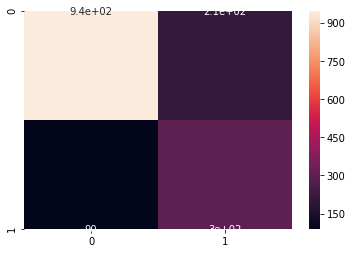

In [30]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True)